<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
movies.loc[:,'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:
print(movies.loc[:,'duration'].min())
print(movies.loc[:,'duration'].max())

#alternate method sorting values low to high and then taking the top result and bottom
print(movies.loc[:,'duration'].sort_values().head(1))
print(movies.loc[:,'duration'].sort_values().tail(1))

64
242
389    64
Name: duration, dtype: int64
476    242
Name: duration, dtype: int64


#### Create a histogram of duration, choosing an "appropriate" number of bins.

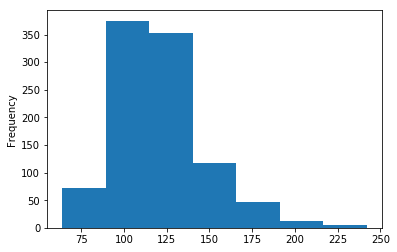

In [7]:
# Answer:
ax = movies.loc[:,'duration'].plot(kind='hist', bins=7)

#### Use a box plot to display that same data.

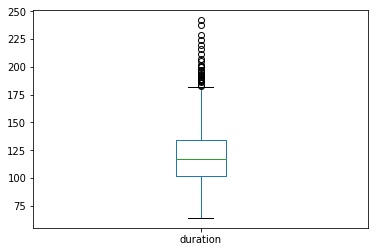

In [8]:
# Answer:
ax = movies.loc[:,'duration'].plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
# Answer:
print(movies.loc[:,'content_rating'].value_counts())

#alternate response grouping movies by content and then counting the title count
print(movies.groupby('content_rating').agg({'title' : 'count'}))

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64
                title
content_rating       
APPROVED           47
G                  32
GP                  3
NC-17               7
NOT RATED          65
PASSED              7
PG                123
PG-13             189
R                 460
TV-MA               1
UNRATED            38
X                   4


#### Use a visualization to display that same data, including a title and x and y labels.

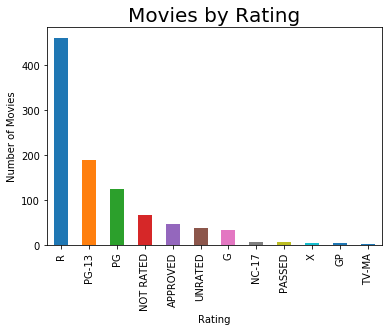

In [10]:
# Answer:
ax = movies.loc[:,'content_rating'].value_counts().plot(kind='bar')
ax.set_title('Movies by Rating', fontsize=20)
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Movies');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [11]:
# Answer:
def unrated_rating(row):
    #look in content_rating column for 'NOT RATED'
    if row.loc['content_rating'] == 'NOT RATED':
        #Assign corrected rating to UNRATED
        corrected_rating = 'UNRATED'
    #look in content_rating column for 'APPROVED'
    elif row.loc['content_rating'] == 'APPROVED':
        #Assign corrected rating to UNRATED
        corrected_rating = 'UNRATED'
    #look in content_rating column for 'PASSED'
    elif row.loc['content_rating'] == 'PASSED':
        #Assign corrected rating to UNRATED
        corrected_rating = 'UNRATED'
    #look in content_rating column for 'GP
    elif row.loc['content_rating'] == 'GP':
        #Assign corrected rating to UNRATED
        corrected_rating = 'UNRATED'
    #Otherwise
    else:
        #keep original rating
        corrected_rating = row.loc['content_rating']
    #Return the corrected rating
    return corrected_rating

movies.loc[:, 'corrected_rating'] = movies.apply(unrated_rating, axis='columns')

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [12]:
# Answer:
def nc_17_rating(row):
    if row.loc['corrected_rating'] == 'X':
        corrected_rating2 = 'NC-17'
    elif row.loc['corrected_rating'] == 'TV-MA':
        corrected_rating2 = 'NC-17'
    else:
        corrected_rating2 = row.loc['corrected_rating']
    return corrected_rating2

movies.loc[:, 'corrected_rating2'] = movies.apply(nc_17_rating, axis='columns')


#### Count the number of missing values in each column.

In [15]:
# movies = movies.drop(['content_rating', 'corrected_rating'], axis=1)
# movies = movies.rename(columns={'corrected_rating2' : 'content_rating'})
#ran each of the above commands once to alter movies df


# Answer:
movies.isna().sum()

star_rating       0
title             0
genre             0
duration          0
actors_list       0
content_rating    3
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [44]:
# Answer:
# finding which movies are missing content ratings
movies.loc[movies.loc[:,'content_rating'].isna(),:]

# filling in missing values with unrated
movies.loc[:,'content_rating'] = movies.loc[:,'content_rating'].fillna(value='UNRATED')


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [45]:
# Answer:
movies.loc[movies.loc[:,'duration'] > 120, 'star_rating'].mean()

7.953669724770622

#### Use a visualization to detect whether there is a relationship between duration and star rating.

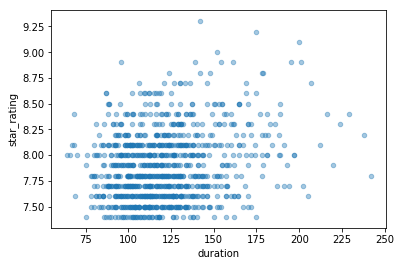

In [22]:
# Answer:
ax = movies.plot(kind='scatter', x='duration', y='star_rating', alpha=.4)

#### Calculate the average duration for each genre.

In [23]:
# Answer:
movies.groupby('genre').agg({'duration':'mean'})

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

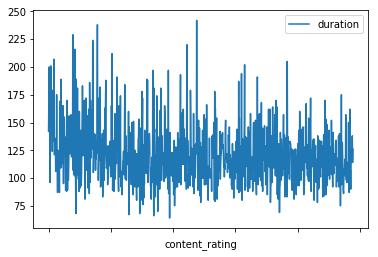

In [47]:
# Answer:
ax = movies.plot(x='content_rating', y='duration')

#### Find the title of the movie with the highest star rating in each genre

In [104]:
# Answer:
movies.groupby('genre').agg({'star_rating': 'max'})

,star_rating
genre,
Action,9.0
Adventure,8.9
Animation,8.6
Biography,8.9
Comedy,8.6
Crime,9.3
Drama,8.9
Family,7.9
Fantasy,7.7


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [99]:
# Answer:
dup = movies["title"]
movies[dup.isin(dup[dup.duplicated()])].sort_values("title")
#Not duplicates because they have different ratings, genres, durations, etc.

,star_rating,title,genre,duration,actors_list,content_rating
703,7.6,Dracula,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",UNRATED
905,7.5,Dracula,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",R
678,7.7,Les Miserables,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...",PG-13
924,7.5,Les Miserables,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",PG-13
466,7.9,The Girl with the Dragon Tattoo,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe...",R
482,7.8,The Girl with the Dragon Tattoo,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",R
662,7.7,True Grit,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",PG-13
936,7.4,True Grit,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",UNRATED


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [90]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [91]:
# Answer:
grouped_movies = movies.groupby('genre').agg({'title': 'count', 'star_rating': 'mean'})
grouped_movies.loc[grouped_movies.loc[: , 'title'] > 10, :]

,title,star_rating
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [97]:
movies.loc[:,'actors_list'].describe()

count                                                   979
unique                                                  969
top       [u'Daniel Radcliffe', u'Emma Watson', u'Rupert...
freq                                                      6
Name: actors_list, dtype: object

In [96]:
dup_actors = movies["actors_list"]
movies[dup_actors.isin(dup_actors[dup_actors.duplicated()])].sort_values("actors_list")

,star_rating,title,genre,duration,actors_list,content_rating
222,8.1,Harry Potter and the Deathly Hallows: Part 2,Adventure,130,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert...",PG-13
551,7.8,Harry Potter and the Prisoner of Azkaban,Adventure,142,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert...",PG
642,7.7,Harry Potter and the Deathly Hallows: Part 1,Adventure,146,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert...",PG-13
727,7.6,Harry Potter and the Goblet of Fire,Adventure,157,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert...",PG-13
891,7.5,Harry Potter and the Half-Blood Prince,Adventure,153,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert...",PG
932,7.4,Harry Potter and the Order of the Phoenix,Adventure,138,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert...",PG-13
359,8.0,The Hobbit: The Desolation of Smaug,Adventure,161,"[u'Ian McKellen', u'Martin Freeman', u'Richard...",PG-13
814,7.6,The Hobbit: The Battle of the Five Armies,Adventure,144,"[u'Ian McKellen', u'Martin Freeman', u'Richard...",PG-13
12,8.8,Star Wars: Episode V - The Empire Strikes Back,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi...",PG
19,8.7,Star Wars,Action,121,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi...",PG


The actors from the Harry Potter movies show up 6 times